## **神经网络基础**

#### **神经网络的构成**

人工神经网络(Artificial Neural Network(ANN)), 简称**神经网络(NN)**. 是一种模仿生物神经网络结构和功能的计算模型.大多数人工神经网络可以在外界信息的基础上改变内部结构, 是一种自适应系统的, 通俗来讲就是具备学习功能.

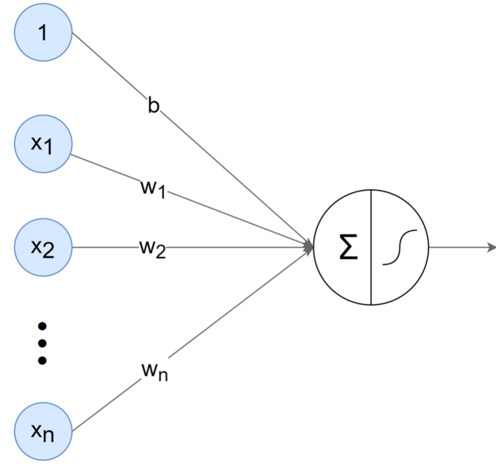

人工神经网络中的神经元一般可对多个输入进行加权求和, 然后通过激活函数进行非线性映射, 输出给下一层的神经元.

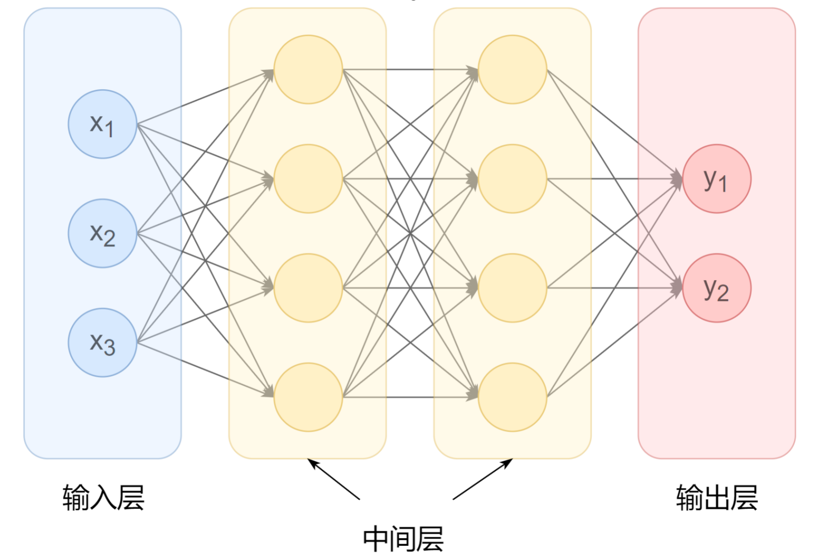

使用多个神经元就可以构建多层神经网络, 最左边一层神经元都表示输入叫做**输入层**, 最右边一层代表了网络的输出称为**输出层**, 输入层与输出层之间的层统称为**隐藏层**.

相邻层的神经元相互连接(下一层神经元都与前一层的每个神经元相连叫做**全连接**), 每个连接都有一个**权重**

神经元中的信息逐层传递(称之为**前向传播**), 上一层的输出作为下一层的输入

感知机: 感知机(Perceptron)是**单层感知机**, 感知机是一种**二分类器**, 感知机通过学习权重向量, 构建一个超平面, 用来将输入数据分为两个类别.

感知机本质上在做的是在样本空间中的一次线性可分, 公式为:

$$
y =
\begin{cases}
0 & \text{if } b + w_1 x_1 + w_2 x_2 \le 0 \\[2mm]
1 & \text{if } b + w_1 x_1 + w_2 x_2 > 0
\end{cases}
$$

这里将界限的阈值设为0。除了权重w1,w2之外，还可以增加一个参数b，被称为 **偏置**。其中多个输入信号都具有各自的权重, 权重表达了输入信号对输出的重要性, 偏置决定了神经元激活的难易程度.

可以看出公式中其实包含了两步操作1. 首先根据各自的权重和偏置计算一个加权和, 2. 然后根据和阈值比较获得大小关系, 输出0, 1

那么定义一个函数:

$$
h(x) =
\begin{cases}
0 & (x \leq 0) \\
1 & (x > 0)
\end{cases}
$$

就可以将感知机函数简化为:

$$
y = h(b + w_1x_1 + w_2x_2)
$$

即

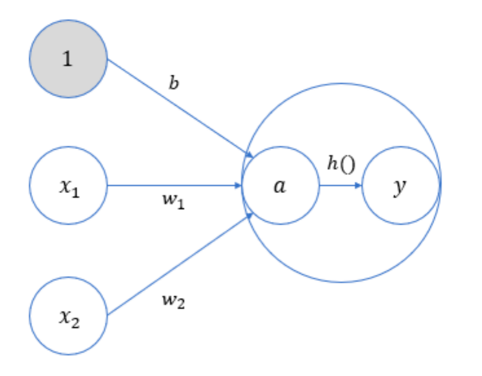

h()函数将可以将输入信号的加权和转换为输出信号, 起到了激活神经元的作用, 所以h这样的函数被称为**激活函数**.

由此我们可以总结一下, 感知机是一个激活函数为阶跃函数的加权和结构, 他的局限性在于变换都是线性的只能处理线性问题, 而人工神经元在再感知机的基础上**将阶跃函数替换为连续、可微的非线性激活函数**使人工神经网络具备非线性映射的能力, 而神经网络则能够处理非线性问题.


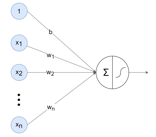
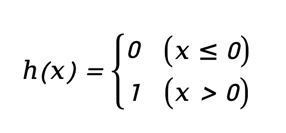

#### **激活函数**

激活函数是连接感知机和神经网络的桥梁有很重要的作用.现在想象一种情况, 如果没有激活函数, 那么神经网络就会完全等效于一个单层的线性变换, 无论怎样增加层数总会有一个"无隐藏层的神经网络"与之等效, 激活函数是非线性函数正是激活神经元的非线性映射作用, 使得神经网络具备处理非线性问题的能力.

##### **阶跃函数(Binary step)**

感知机模型中使用的就是阶跃函数, 输入一个值, 如果大于0则返回1, 否则返回0, 这种函数被称为阶跃函数.

$$
f(x) =
\begin{cases}
0, & x < 0 \\
1, & x \geq 0
\end{cases}, \quad f'(x) = 0
$$

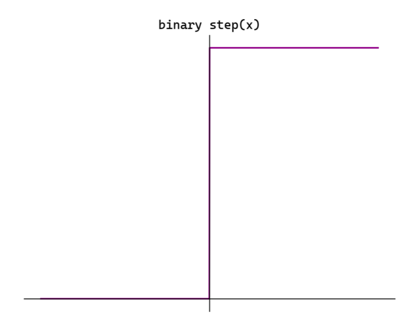

阶跃函数导数恒为0, (0, 0)处不可导

##### **Sigmoid函数**

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

$$
f'(x) = \frac{1}{1 + e^{-x}} \left(1 - \frac{1}{1 + e^{-x}}\right) = f(x)(1 - f(x))
$$

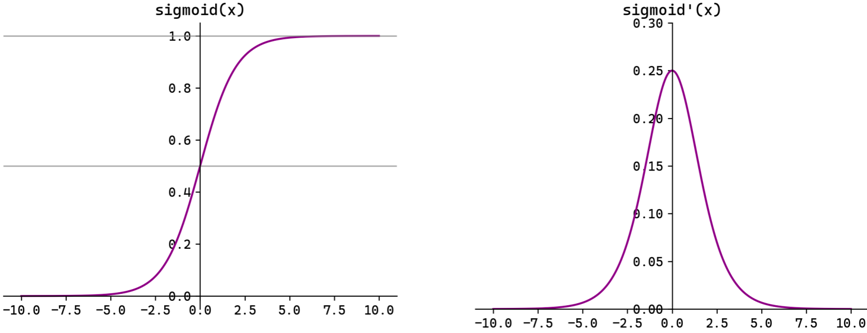

Sigmoid函数是平滑可微的, 能将任意输入映射到(0, 1)区间, 常用于二分类的输出层。但因其涉及指数运算，计算量相对较高。

Sigmoid的输入在[-6,6]之外时，其输出值变化很小，可能导致信息丢失。

Sigmoid的输出并非以0为中心，其输出值均＞0，导致后续层的输入始终为正，可能影响后续梯度更新方向。

Sigmoid的导数范围为(0,0.25)，梯度较小。当输入在[-6,6]之外时，导数接近0，此时网络参数的更新将会极其缓慢。使用Sigmoid作为激活函数，**可能出现梯度消失（在逐层反向传播时，梯度会呈指数级衰减）.**

##### **tanh函数(双曲正切)**

$$
f(x) = \frac{1 - e^{-2x}}{1 + e^{-2x}}
$$

$$
f'(x) = 1 - \left( \frac{1 - e^{-2x}}{1 + e^{-2x}} \right)^2 = 1 - f^2(x)
$$

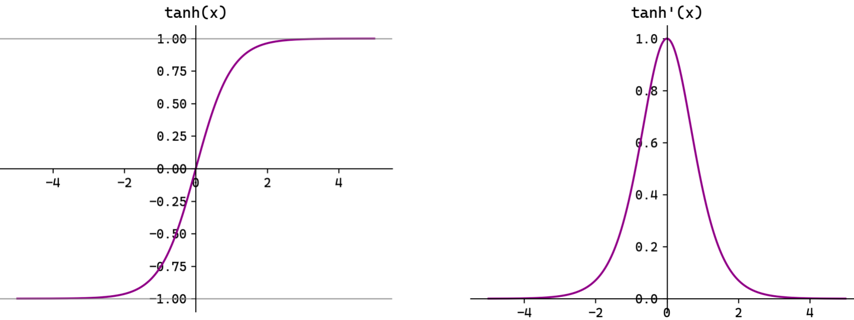

tanh函数(双曲正切)将输入映射到区间(-1, 1)内, 关于原点对称, 常用在隐藏层.

输入在[-3,3]之外时，Tanh的输出值变化很小，此时其导数接近0。

Tanh的输出以0为中心，且其梯度相较于Sigmoid更大，收敛速度相对更快。**但同样也存在梯度消失现象。**

##### **Relu函数(修正线性单元)**

$$
f(x) = \max(0, x) =
\begin{cases}
0, & x \leq 0 \\
x, & x > 0
\end{cases}
$$

$$
f'(x) =
\begin{cases}
0, & x \leq 0 \\
1, & x > 0
\end{cases}
$$

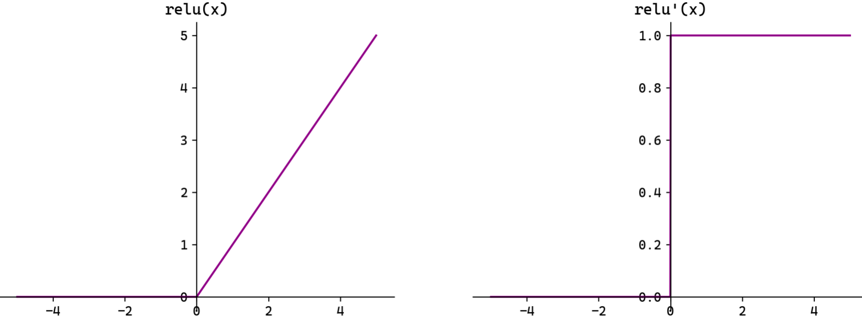

ReLU（Rectified Linear Unit，修正线性单元）会将小于0的输入转换为0，大于等于0的输入则保持不变。ReLU定义简单，计算量小。常用于隐藏层。

ReLU作为激活函数不存在梯度消失。当输入小于0时，ReLU的输出为0，这意味着在神经网络中，ReLU激活的节点只有部分是“活跃”的，这种稀疏性有助于减少计算量和提高模型的效率。

当神经元的输入持续为负数时，ReLU的输出始终为0。这意味着神经元可能永远不会被激活，从而导致“神经元死亡”问题。这会影响模型的学习能力，特别是如果大量的神经元都变成了“死神经元”

可以使用Leaky ReLU代替ReLU来作为激活函数, Leaky ReLU在负数区域引入一个小小的斜率来解决神经元死亡的问题.

$$
f(x) =
\begin{cases}
\alpha x, & \text{if } x \leq 0 \\
x, & \text{if } x > 0
\end{cases}
$$

##### **Softmax函数**

$$
y_k = \frac{e^{x_k}}{\sum_{i=1}^n e^{x_i}}, \quad k = 1 \sim n
$$

$$
\frac{\partial y_k}{\partial x_i} =
\begin{cases}
y_k(1 - y_i), & k = i \\
- y_k y_i, & k \ne i
\end{cases}
$$

Softmax将一个任意的实数向量转换为一个概率分布，确保输出值的总和为1,是二分类激活函数Sigmoid在多分类上的推广。Softmax常用于多分类问题的输出层，用来表示类别的预测概率。

Softmax会放大输入中较大的值，使得最大输入值对应的输出概率较大，其他较小的值会被压缩。即在类别之间起到了一定的区分作用。

我来对于隐藏层为什么可以学习到样本中的特征发表一下自己的见解, 因为神经网络对于每一批batch数据都会进行前向计算和反向传播, 前向计算后就会知道当前神经网络模型与真实值之间的loss, 我们永远希望loss值是尽可能小的所以就会对不同权值进行求导并且根据导数值反方向更新权值, 这个过程中潜移默化的减少了非特征对最后loss值的贡献度, 并且相对的就增加了真正重要的那部分特征, 这部分特征往往就是样本中我们觉得是主要特征的部分


对于RELU激活函数中, 数值为负数时直接映射为0, 我来发表一下我的见解, 就单个样本来讲线性变换之后的值为负我们认为他并不是当前神经元需要检测的主要特征, 所以他就被映射为0并不参与下一层的组合, 但是有可能当前样本为一个异常点, 所以当下一个样本输入后此时不为负了神经元自然觉得这有可能为一个我需要检测到的特征, 就给予斜率在反向传播时更新参数

反向传播过程, 结果的Loss函数会对权值求偏导, 链式法则会先对激活函数求导, 所以激活函数的梯度会对神经网络整体的学习产生影响, 而激活函数对线性映射的值进行非线性映射的过程中本质上就是对特征选择的过程, 不同的激活函数映射的结果不一样本质上都是对自己关注的部分映射为较大的值
| 激活函数       | 关注区域                  | 忽略区域     | 特征选择风格                             |
|----------------|--------------------------|--------------|------------------------------------------|
| ReLU           | $ z > 0 $               | $ z \leq 0 $ | 硬阈值：非黑即白，稀疏激活               |
| Leaky ReLU     | 全部                     | 无           | 软阈值：负值也保留微弱信号               |
| Sigmoid        | 中间区域（$ z \in [-2, 2] $） | 极端值       | 平滑门控：所有输入都参与，但极端值被压缩 |
| Swish / GELU   | 自适应                   | —            | 数据驱动：根据输入动态调整响应强度       |

#### **其他激活函数**

##### **Identity(恒等函数)**

f(x) = x, f`(x) = 1
恒等函数，输入输出一致，常用于输出层, 线性回归的输出层一般使用恒等函数.

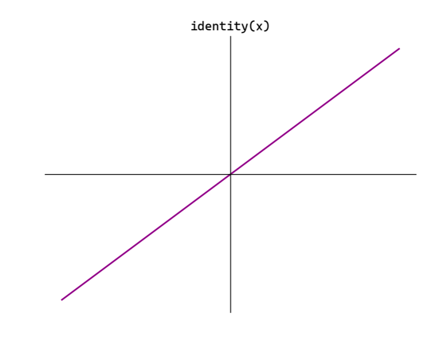

##### **Leaky ReLU**

$$
f(x) =
\begin{cases}
\alpha x, & x \leq 0 \\
x, & x > 0
\end{cases}
,\quad
f'(x) =
\begin{cases}
\alpha, & x \leq 0 \\
1, & x > 0
\end{cases}
$$

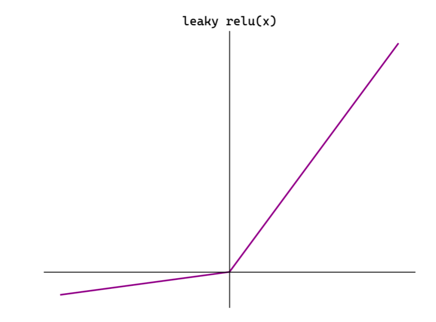

##### **PReLU**

$$
f(x) =
\begin{cases}
\alpha x, & x \leq 0 \\
x, & x > 0
\end{cases}
,\quad
f'(x) =
\begin{cases}
\alpha, & x \leq 0 \\
1, & x > 0
\end{cases}
$$

PReLU中的参数α是可学习的，因此PReLU可以学习到数据的分布特征，从而提高模型的泛化性能。

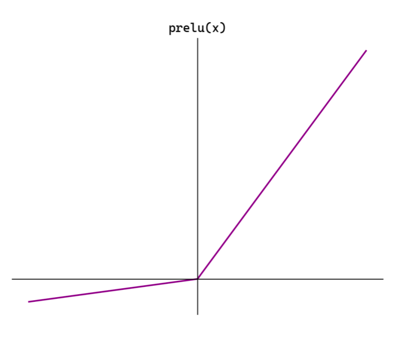

##### **RReLU**

$$
f(x) =
\begin{cases}
\alpha x, & x \leq 0 \\
x, & x > 0
\end{cases}
,\quad
f'(x) =
\begin{cases}
\alpha, & x \leq 0 \\
1, & x > 0
\end{cases}
$$

这里α是一个在训练时从一个均匀分布中随机选择的参数.

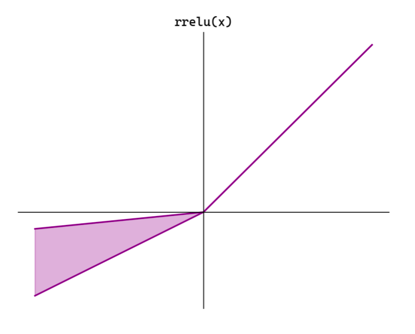

##### **ELU**

$$
f(x) =
\begin{cases}
\alpha (e^x - 1), & x \leq 0 \\
x, & x > 0
\end{cases}
,\quad
f'(x) =
\begin{cases}
\alpha e^x, & x \leq 0 \\
1, & x > 0
\end{cases}
$$

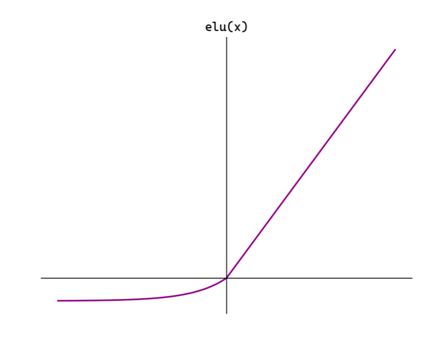

##### **Swish**

$$
f(x) = \frac{x}{1 + e^{-x}}, \quad f'(x) = \frac{1 + e^{-x} + x e^{-x}}{(1 + e^{-x})^2}
$$

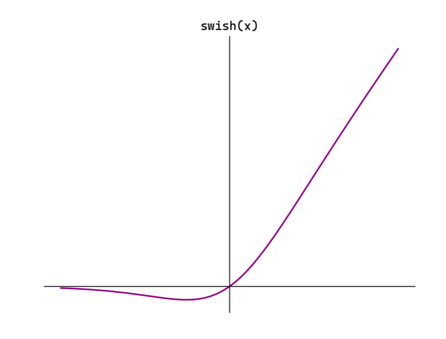


##### **Softplus**

$$
f(x) = \ln(1 + e^x), \quad f'(x) = \frac{1}{1 + e^{-x}}
$$

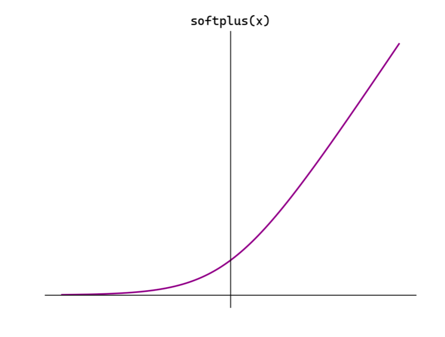

##### **激活函数的选择**

1. 隐藏层
    1. 首选ReLU, 如果效果不好可以尝试Leaky ReLU等ReLU函数的变体
    2. Sigmoid在隐藏层容易导致梯度消失, 应尽量避免
    3. Tanh的输出均值为0, 对中心化数据更友好, 但是仍可能引发梯度消失, 仅适用于浅层网络
2. 输出层
    1. 二分类选择Sigmoid
    2. 多分类选择Softmax
    3. 回归默认选择Identity